# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called chipo.

In [3]:
chipo=pd.read_table('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv')

### Step 4. See the first 10 entries

In [4]:
chipo.plot()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

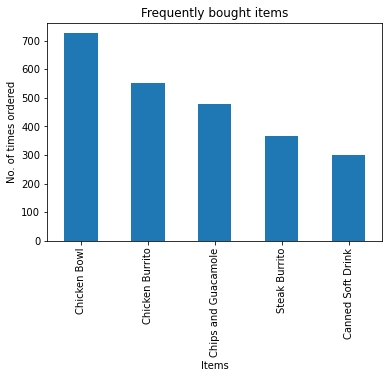

In [22]:
chipo.item_name.value_counts().head(5).plot(kind='bar')
plt.xlabel('Items')
plt.ylabel('No. of times ordered')
plt.title('Frequently bought items');

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

In [29]:
chipo.item_price=chipo.item_price.apply(lambda x: float(x.replace('$','')))

In [32]:
orders=chipo.groupby('order_id').sum()

In [34]:
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0.5, 1.0, 'Quantity ordered per order price')

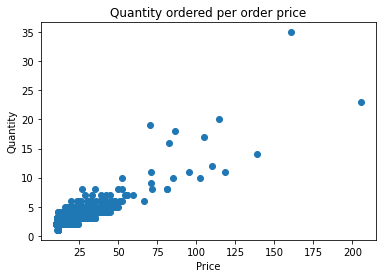

In [42]:
plt.scatter(x=orders.item_price,y=orders.quantity);
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.title('Quantity ordered per order price')

### Step 7. BONUS: Create a question and a graph to answer your own question.

### Plot top 5 highest revenue earned product

In [44]:
chipo['revenue']=chipo.quantity*chipo.item_price

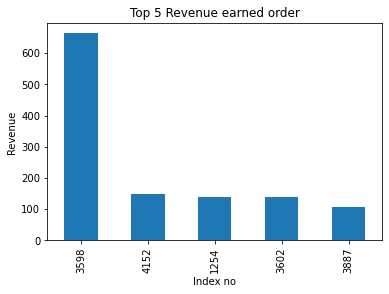

In [74]:
chipo.revenue.sort_values(ascending=False).head().plot(kind='bar')
plt.xlabel('Index no')
plt.ylabel('Revenue')
plt.title('Top 5 Revenue earned order');